4.1. Реализовать методы Эйлера, Рунге-Кутты и Адамса 4-го порядка в виде программ, задавая в качестве входных данных шаг сетки h. С использованием разработанного программного обеспечения решить задачу Коши для ОДУ 2-го порядка на указанном отрезке. Оценить погрешность численного решения с использованием метода Рунге – Ромберга и путем сравнения с точным решением. 

Вариант 23

Задача Коши:

$$ x^2 y'' + xy' - y -3x^2 = 0 $$ 


$$ y(1) = 3,   y'(1) = 2 $$

$$x \in [1,2], h = 0.1$$



Точное решение: 

$$ y = x^2 + x + \frac{1}{x}$$

In [129]:
import matplotlib.pyplot as plt
import typing
import math

In [111]:
def frange(start:float, stop:float, step:float) -> float:
    while start < stop:
        yield start
        start += step

Границы и начальные условия

In [112]:
a, b, h = 1, 2, 0.1

In [113]:
y, y1 = 3, 2

In [114]:
X = [x for x in frange(a, b+h, h)]

In [115]:
def f_accurate(x:float) -> float:
    return x**2 + x + 1/x

Приведём уравнение  к более удобному виду

$$ y'' = 3 + \frac{y}{x^{2}} - \frac{y'}{x}

In [116]:
def f11(x:float, y:float, y1:float) -> float:  #  y' == f(x, y)
    return 3 + y/x**2 - y1/x

#### Явный метод Эйлера

In [117]:
def euler_vivid_y(x:float, y0:float, z0:float, f:typing.Callable[[float, float, float], float], h:float) -> (float, float): # p == 1
    z = z0 + h * f(x, y0, z0)
    y = y0 + h * z
    return z, y

#### Методы Рунге-Кутты

#### Метод Рунге-Кутты четвертого порядка точности

In [118]:
def runge_knutta_4(x:float, y0:float, z0:float, f:typing.Callable[[float, float, float], float], h:float) -> (float, float):
    K1 = h * z0
    L1 = h * f(x, y0, z0)
    K2 = h * (z0 + L1 / 2)
    L2 = h * f(x + h / 2, y0 + K1 / 2, z0 + L1 / 2)
    K3 = h * (z0 + L2/2) 
    L3 = h * f(x + h / 2, y0 +  K2 / 2, z0 + L2 / 2)
    K4 = h * (z0 + L3)
    L4 = h * f(x + h, y0 +  K3, z0 + L3)

    delta_y =  (K1 + 2* K2 + 2 * K3 + K4) / 6
    delta_z =  (L1 + 2* L2 + 2 * L3 + L4) / 6
    return z0 + delta_z, y0 + delta_y

#### Метод Рунге-Кутты Второго порядка точности

In [119]:
def runge_knutta_2(x:float, y0:float, z0:float, f:typing.Callable[[float, float, float], float], h:float) -> (float, float):
    K1 = h * z0
    L1 = h * f(x, y0, z0)
    K2 = h * (z0 + L1 / 2)
    L2 = h * f(x + h / 2, y0 + K1 / 2, z0 + L1 / 2)

    delta_y =  (K1 +  K2) / 2
    delta_z =  (L1 + L2) / 2
    return z0 + delta_z, y0 + delta_y

### Универсальная функция

In [120]:
def func(a:float, b:float, z:float, y:float, step:float, f11:typing.Callable, fun:typing.Callable) -> (list, list):
    y_a, z_a = [y], [z]
    for x in frange(a+h, b+h, step):
        z, y = fun(x, y, z, f11, step)
        z_a.append(z)
        y_a.append(y)
    return y_a, z_a

### Метод Адамса

Второго порядка

In [121]:
def Ad2(X:list, h:float, y0:float, z0:float, f11:typing.Callable) -> (list, list):
    z, y = func(a, a+h, y0, z0, h, f11, runge_knutta_4)

    for i in range(1, len(X) - 1):
        z.append(z[i] + h * (3 * f11(X[i], y[i], z[i]) - f11(X[i-1], y[i-1], z[i-1])) / 2)
        y.append(y[i] + h * (3 * z[i] - z[i-1]) / 2)

    return z, y


Четвертого порядка

In [207]:
def Ad4(X:list, h:float, y0:float, z0:float, f11:typing.Callable) -> (list, list):
    z, y = func(a, a+3*h , y0, z0, h, f11, runge_knutta_4)

    for i in range(3, len(X) - 1):
        z.append(z[i] + h * (55 * f11(X[i], y[i], z[i]) - 59 * f11(X[i-1], y[i-1], z[i-1]) + 37 * f11(X[i-2], y[i-2], z[i-2]) - 9 * f11(X[i-3], y[i-3], z[i-3])) / 24)
        y.append(y[i] + h * (55 * z[i] - 59 * z[i-1] + 37 * z[i-2] - 9 * z[i-3]) /24)

    return z, y

### Запуск

In [208]:
euler = func(a, b, y, y1, h, f11, euler_vivid_y)[1]
rg2 = func(a, b, y, y1, h, f11, runge_knutta_2)[1]
rg4 = func(a, b, y, y1, h, f11, runge_knutta_4)[1]
ad2 = Ad2(X, h, y, y1, f11)[1]
ad4 = Ad4(X, h, y, y1, f11)[1]
y_valid = [f_accurate(x) for x in X]

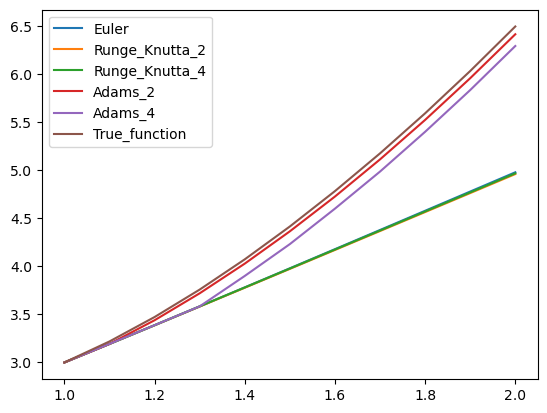

In [209]:
plt.plot(X, euler, label='Euler')
plt.plot(X, rg2, label='Runge_Knutta_2')
plt.plot(X, rg4, label='Runge_Knutta_4')
plt.plot(X, ad2, label='Adams_2')
plt.plot(X, ad4, label='Adams_4')
plt.plot(X, y_valid, label='True_function')
plt.legend()
plt.show()

### Оценки погрешностей

In [210]:
def runge_rombert(Fh:float, Fkh:float, k:float, p:float) -> float:
    return Fh + ((Fh - Fkh) / (k**p - 1))

def mse(y_pred:list, y_valid:list) -> float:
    return math.sqrt(sum((y1 - y0) ** 2 for y1, y0 in zip(y_pred, y_valid)))

Ошибка методом Рунге Ромберта Ричардсона

In [211]:
print('Runge Rombert Error Euler', mse(euler, [runge_rombert(e, e_10, h - h/5, 1) for e, e_10 in zip(euler, func(a, b, y, y1, h/10, f11, euler_vivid_y)[1])] ))
print('Runge Rombert Error Runge_Knutta_2', mse(rg2, [runge_rombert(rg, rgg,h - h/5, 2) for rg, rgg in zip(rg2,  func(a, b, y, y1, h/10, f11, runge_knutta_2)[1])]))
print('Runge Rombert Error Runge_Knutta_4', mse(rg4, [runge_rombert(rg, rgg,h - h/5, 4) for rg, rgg in zip(rg2,  func(a, b, y, y1, h/10, f11, runge_knutta_4)[1])]))
print('Runge Rombert Error Adams_2', mse(ad2,[runge_rombert(ad, add, h - h/5, 2) for ad, add in zip(ad2, Ad2(X, h/10, y, y1, f11)[1])]))
print('Runge Rombert Eerror Adams_4', mse(ad4, [runge_rombert(ad, add, h - h/5, 4) for ad, add in zip(ad4, Ad4(X, h/10, y, y1, f11)[1])]))

Runge Rombert Error Euler 3.7966141932895723
Runge Rombert Error Runge_Knutta_2 3.4834159176558006
Runge Rombert Error Runge_Knutta_4 3.476206465565569
Runge Rombert Error Adams_2 5.787161774815183
Runge Rombert Eerror Adams_4 5.433770979239606


Ошибка в сравнении с точным значением

In [212]:
print('Error Euler', mse(euler, y_valid))
print('Error Runge_Knutta_2', mse(rg2, y_valid))
print('Error Runge_Knutta_4', mse(rg4, y_valid))
print('Error Adams_2', mse(ad2, y_valid))
print('Error Adams_4', mse(ad4, y_valid))

Error Euler 2.496292433838972
Error Runge_Knutta_2 2.528656526331737
Error Runge_Knutta_4 2.5137816050372015
Error Adams_2 0.178548882723426
Error Adams_4 0.5378715566702299
